In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pytorch_lightning as pl
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
import torch as t

from emgen.backend import EmGenDataLoader, GetMetrics
from emgen.evaluation import equal_samples_labels_images, plot_embeddings, plot_sample_images, plot_training
from emgen.models import Standard, ResNet
from emgen.samples.danbooru import *

In [3]:
if not t.cuda.is_available():
    print('Should have CUDA for faster computation')

# Data Preprocessing

In [4]:
# # Get JSON
# extract_file('danbooru-metadata/danbooru-metadata/201700.json')
# json_file = './data/db/201700.json'
# json_dicts = read_json(json_file)
# id_filter = lambda x: int(x['id']) % 1000 <= 150
# id_mag_filter = lambda x: int(x['id']) <= 2_900_000
# uploaders, uploader_counts = np.unique([json_dict['uploader_id'] for json_dict in json_dicts],
#                              return_counts=True)
# sample_size_filter = lambda x: uploader_counts[np.argwhere(x['uploader_id']==uploaders)] >= 50
# admin_uploads = lambda x: int(x['uploader_id']) > 100
# json_filtered = filter_json(json_dicts,
#                             id_filter, # Make sure we have the data in Kaggle
#                             id_mag_filter, # ^
#                             sample_size_filter, # Make sure we have reliable style samples
#                             admin_uploads, # Certain number of users have insane upload numbers
#                             rating='s',
#                             file_ext='jpg')
# # Extract CSV and JPGs
# format_workdir(json_filtered)

# Modeling

In [5]:
# # Clean up
# t.cuda.empty_cache()
# import gc
# #del json_dicts, json_filtered
# gc.collect()

model = ResNet()
dataloader = EmGenDataLoader('./data/db/labels.csv', './data/db', batch_size=128, num_workers=8)

history_cb = GetMetrics()
callbacks = [
    EarlyStopping(monitor='val_loss',
                  min_delta=.01,
                  patience=20,
                  mode='min',
                  verbose=False),
    history_cb
]
trainer = pl.Trainer(gpus=1, max_epochs=100, callbacks=callbacks)
trainer.fit(model, dataloader)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name        | Type       | Params
-------------------------------------------
0 | preprocess  | Sequential | 9.6 K 
1 | blocks      | ModuleList | 11.2 M
2 | postprocess | Sequential | 5.1 K 
-------------------------------------------
11.2 M    Trainable params
0         Non-trainable params
11.2 M    Total params
44.746    Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

/home/thema/repos/emgen/env/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Training: -1it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

/home/thema/repos/emgen/env/lib/python3.9/site-packages/pytorch_lightning/trainer/callback_hook.py:102: LightningDeprecationWarning: The signature of `Callback.on_train_epoch_end` has changed in v1.3. `outputs` parameter has been removed. Support for the old signature will be removed in v1.5
  warning_cache.deprecation(


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

# Visualization

In [6]:
sample_dataloader = EmGenDataLoader('./data/db/labels.csv', './data/db', batch_size=64, num_workers=8)
sample_dataloader.setup()

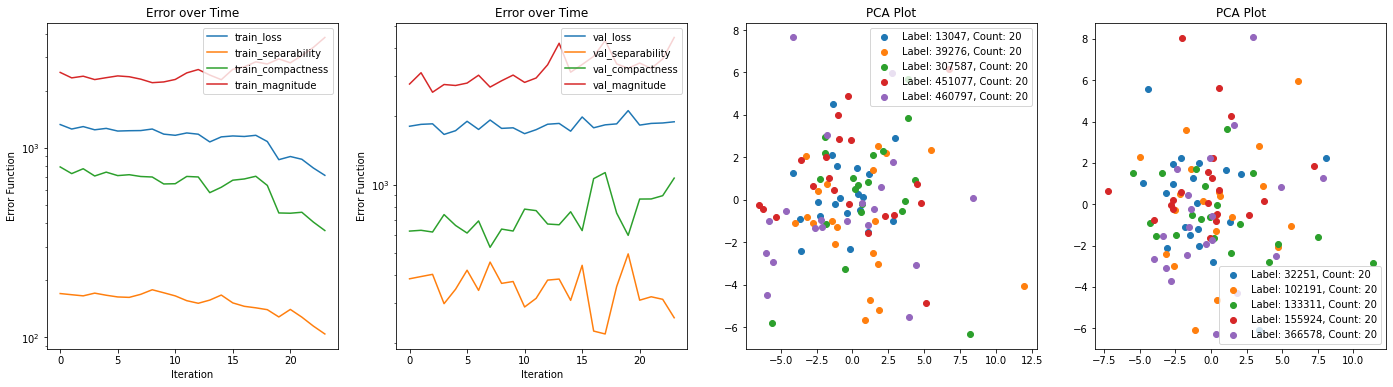

In [7]:
model.cpu()
plt.figure(figsize=(24,6))
plt.subplot(1, 4, 1)
plot_training(history_cb.history, prefix='train_')
plt.subplot(1, 4, 2)
plot_training(history_cb.history, prefix='val_')
plt.subplot(1, 4, 3)
plot_embeddings(model, sample_dataloader.train_dataset)
plt.subplot(1, 4, 4)
plot_embeddings(model, sample_dataloader.val_dataset)
# plt.figure(figsize=(25, 15))
# plot_sample_images(sample_dataloader.val_dataset, dim=(3, 5))